('TCPIP0::192.168.0.29::INSTR', 'TCPIP0::192.168.0.31::INSTR') ---> TCPIP0::192.168.0.29::INSTR
Device Name:  RIGOL TECHNOLOGIES,MSO5074,MS5A220200070,00.01.03.00.03

IP Address:  192.168.0.29

MAC Address:  00:19:AF:7B:18:D8

DNS:  8.8.8.8

Running Tests from 0.00 Volts to 3.00 Volts in 0.10 Volts increment
-----------------------------------------------------------------------
CH1: 0.5602 Vpp
CH2: 0.6290 Vpp
-
CH1: 1.4005 Vpp
CH2: 2.3062 Vpp
-
CH1: 2.2408 Vpp
CH2: 3.9834 Vpp
-
CH1: 3.3612 Vpp
CH2: 5.8703 Vpp
-
CH1: 4.2015 Vpp
CH2: 7.7572 Vpp
-
CH1: 5.3218 Vpp
CH2: 9.4344 Vpp
-
CH1: 6.1621 Vpp
CH2: 11.3210 Vpp
-
CH1: 7.2825 Vpp
CH2: 12.5790 Vpp
-
CH1: 8.1228 Vpp
CH2: 13.8370 Vpp
-
CH1: 8.9631 Vpp
CH2: 14.6760 Vpp
-
CH1: 9.8034 Vpp
CH2: 15.5140 Vpp
-
CH1: 10.9240 Vpp
CH2: 16.5630 Vpp
-
CH1: 11.7640 Vpp
CH2: 17.4010 Vpp
-
CH1: 12.6040 Vpp
CH2: 18.0300 Vpp
-
CH1: 13.7250 Vpp
CH2: 18.8690 Vpp
-
CH1: 14.5650 Vpp
CH2: 19.4980 Vpp
-
CH1: 15.6850 Vpp
CH2: 20.3360 Vpp
-
CH1: 16.8060 Vpp
CH2: 2

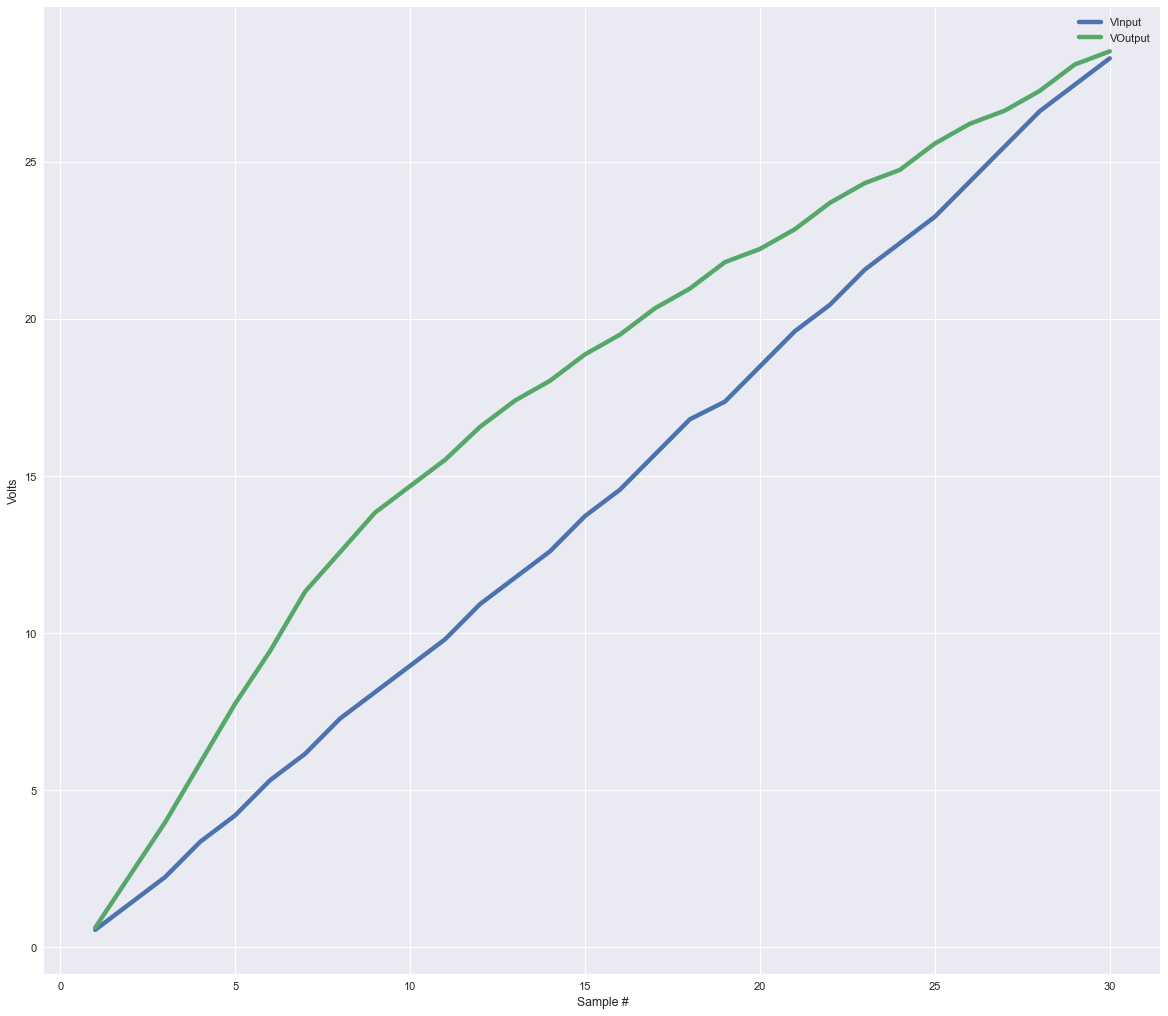

In [74]:
# SCRIPT FOR AUDIO COMPRESSOR DATA PLOT 
# Author: @owel.codes
# Date: 5.20.22

# Use PYTHON 3.9.7 (under PyVisa environment)
import numpy as np
import pyvisa
import time
import csv 
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
%matplotlib inline
figure(figsize=(18, 16), dpi=80)

rm = pyvisa.ResourceManager()
res = rm.list_resources()
print(res, '--->', res[0])
rigol = rm.open_resource(res[0])

# GET IP ADDRESS OF SCOPE (VIA SCOPE CONTROLS) AND PASTE IT DOWN HERE 
# Utility -> IO -> LAN -> VISA address
# scope_address = 'TCPIP::192.168.0.29::INSTR'
# rigol = rm.open_resource(scope_address)

# SANITY CHECK, TO VERIFY A SUCCESSFUL CONNECTION
# WE SHOULD BE GETTING CORRECT VALUES BACK FROM THE SCOPE
print('Device Name: ', rigol.query('*IDN?'))
print('IP Address: ', rigol.query('LAN:IPAD?'))
print('MAC Address: ', rigol.query('LAN:MAC?'))
print('DNS: ', rigol.query('LAN:DNS?'))

# set test parameters for this run
set_freq = 1000    # Test Frequency / Hertz
volts_increment = 0.100
volts_start = 0

# Using +/- 18V supply, max output before clipping is 30Vpp 
# with an amplifier gain of 10, this needs to be 3Vpp max
volts_end = 3

# Gain for First Amplifier (if no attenuation)
amplifier_gain = 10

ch1_dataset = []
ch2_dataset = []

# export file
ch1_filepath = "ch1_data.csv"
ch2_filepath = "ch2_data.csv"


# set bandwidth limit on CH1 and CH2
rigol.write('channel1:bwlimit 20M')
rigol.write('channel2:bwlimit 20M')


print ("Running Tests from %0.2f Volts to %0.2f Volts in %0.2f Volts increment"%(volts_start, volts_end, volts_increment))
print("-----------------------------------------------------------------------")
for sample_volts in np.arange(volts_start, volts_end, volts_increment): 
    rigol.write('1:frequency '+ str(set_freq))  # freq
    rigol.write('1:apply:sin')  #sine
    rigol.write('1:output ON')  #turn on G1 function gen
    rigol.write('1:volt ' + str(sample_volts))    # set Volts output

    # make waveform pretty on display
    # rigol.write('autoscale')    #autoscale
    # rigol.write('system:key:decrease hscale,1')
    # delay here so the next command below doesn't time out
    time.sleep(3) # sec delay

    # measure channel 1 Vpp 
    rigol.write('measure:source chan1')
    rigol.write('measure:item VPP,channel1')
    ch1Vpp = rigol.query('measure:item? VPP,channel1')
    ch1Vpp = float(ch1Vpp) * 10
    ch1_dataset.append(float(ch1Vpp))  # store voltage reading
    print("CH1: %0.4f Vpp"%(float(ch1Vpp)))

    # measure channel 2 Vpp
    rigol.write('measure:source chan2')
    rigol.write('measure:item VPP,channel2')
    ch2Vpp = rigol.query('measure:item? VPP,channel2')
    ch2_dataset.append(float(ch2Vpp))  # store voltage reading
    print("CH2: %0.4f Vpp"%(float(ch2Vpp)))
    
    print("-") # skip a line 


# plot the gathered data    
mpl.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 10)
x = np.arange(1,len(ch1_dataset)+1)
plt.plot( x, ch1_dataset, label="VInput", linewidth=4.0)
plt.plot( x, ch2_dataset, label="VOutput", linewidth=4.0, linestyle="-")
plt.xlabel('Sample #')
plt.ylabel('Volts')
plt.legend()
plt.show()


# save our collected data to CSV file
with open(ch1_filepath, 'w', newline='') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',', quotechar='|', 
                quoting=csv.QUOTE_MINIMAL)
    datawriter.writerow(ch1_dataset)
    
with open(ch2_filepath, 'w', newline='') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',', quotechar='|', 
                quoting=csv.QUOTE_MINIMAL)
    datawriter.writerow(ch2_dataset)    
    

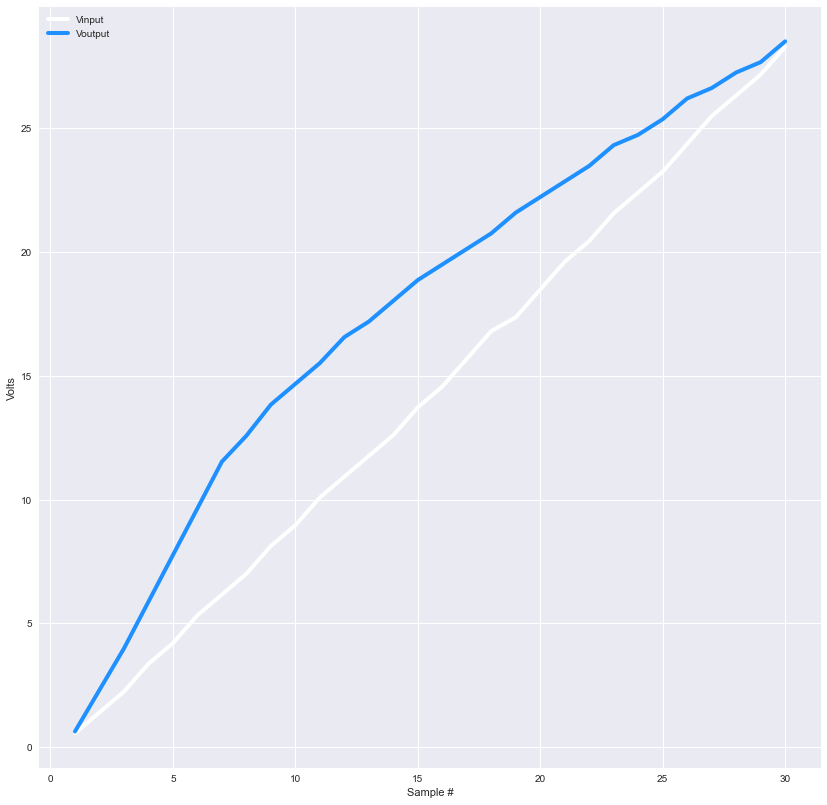

In [73]:
import matplotlib as mpl 
# plot the gathered data     
mpl.style.use('seaborn')
plt.rcParams["figure.figsize"] = (14, 14)
x = np.arange(1,len(ch1_dataset)+1)
plt.plot( x, ch1_dataset, label="Vinput", linewidth=4.0, color="white")
plt.plot( x, ch2_dataset, label="Voutput", linewidth=4.0, color="dodgerblue")   # magenta, blue, darkcyan, olive, saddlebrown, orangered, red grey, dodgerblue, darkmagenta
plt.xlabel('Sample #')
plt.ylabel('Volts')
plt.legend()
plt.show()

In [ ]:
# Use PYTHON 3.9.7 (under PyVisa environment)
import numpy as np
import pyvisa
import time
import csv 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
%matplotlib inline
figure(figsize=(18, 16), dpi=80)

rm = pyvisa.ResourceManager()

# find out what VISA devices we have available from this machine
# must be prior added via NI-VISA Configuration program
res = rm.list_resources()
print(res, '--->', res[0])
rigol = rm.open_resource(res[0])

# OR .... GET IP ADDRESS OF SCOPE (VIA SCOPE CONTROLS) AND PASTE IT DOWN HERE 
# Utility -> IO -> LAN -> VISA address
# scope_address = 'TCPIP0::192.168.0.29::INSTR'
# rigol = rm.open_resource(scope_address)

# SANITY CHECK, TO VERIFY A SUCCESSFUL CONNECTION
# WE SHOULD BE GETTING CORRECT VALUES BACK FROM THE SCOPE
print('Device Name: ', rigol.query('*IDN?'))
print('IP Address: ', rigol.query('LAN:IPAD?'))
print('MAC Address: ', rigol.query('LAN:MAC?'))
print('DNS: ', rigol.query('LAN:DNS?'))

In [177]:
# SIGNAL GENERATOR  DG1022Z 
# --------------------------
# Use PYTHON 3.9.7 (under PyVisa environment)
import numpy as np
import pyvisa
import time
import csv 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
%matplotlib inline
# figure(figsize=(18, 16), dpi=80)

rm = pyvisa.ResourceManager()
res = rm.list_resources()
print(res)
# rigol = rm.open_resource(res[0])        # oscilloscope 
# rigol = rm.open_resource(res[1])        # function generator

function_gen_address = res[1]
# function_gen_address = 'TCPIP0::192.168.0.31::INSTR'      # alternate method
rigol = rm.open_resource(function_gen_address)

# SANITY CHECK, TO VERIFY A SUCCESSFUL CONNECTION
# WE SHOULD BE GETTING CORRECT VALUES BACK FROM THE FUNCTION GENERATOR
print('Device Name: ', rigol.query('*IDN?'))

# settings 
rigol.write('source1:apply:square 1000,5.0,0,0')
rigol.write('source2:apply:triangle 2000,2.5,0,90')

# turn ON
rigol.write('output1 ON')
rigol.write('output2 ON')

# query settings
print(rigol.query('source1:apply?'))
print(rigol.query('source2:apply?'))


('TCPIP0::192.168.0.29::INSTR', 'TCPIP0::192.168.0.31::INSTR')
Device Name:  Rigol Technologies,DG1062Z,DG1ZA221601052,03.01.12  

"SQU,1.000000E+03,5.000000E+00,0.000000E+00,0.000000E+00"

"RAMP,2.000000E+03,2.500000E+00,0.000000E+00,9.000000E+01"

